# Genetic Algorithm for function optimization

The purpose of this notebook is to present a solution of a problem of function optimization using genetic alghoritm based on real chromosome represetnation, the example function will be McCormick Function.

In [1]:
# Imports
from math import sin

## I. Implementation

**I. Configuration**

In [2]:
from math import sin
def target_function(x = []):
    return sin(x[0] + x[1]) + (x[0] - x[1])**2 - 1.5 * x[0] + 2.5 * x[1] +1

In [3]:
# most common evaluation rectangle x1 ∈ [-1.5, 4], x2 ∈ [-3, 4]
# global minimum
X = (-0.54719, -1.54719)
Y = target_function(X)
Y

-1.913222954882274

In [4]:
# number of epochs, just a variable
EPOCHS = 100

# number of individuals
POPULATION_SIZE = 20

# target function args number
N = 2

# evaluation rectangle
X1_RANGE = [-1.5, 4]
X2_RANGE = [-3, 4]

# estimated solution precision
PRECISION = 6

# optimalization type
OPT_TYPE = 0 # minimalization

# selection
SELECTION = "tournament"
SELECTION_PARAM = 3

# crossover
CROSSOVER = "threepoint"
CROSSOVER_PROB = 0.9

# mutation
MUTATION = "any"
MUTATION_N = 3
MUTATION_PROB = 0.1

# inversion
INVERSION_PROB = 0.05

# elitism
ELITISM = True
SURVIVAL_RATE = 0.1

# k-param for arithmatic crossover
K_PARAM = 0.1

**II. Real chromosome representation**

In [5]:
class RealChromosome:
    def __init__(self, x1, x2):
        self.x1 = x1
        self.x2 = x2
        
    def __repr__(self):
        return str((self.x1, self.x2))
    
    def get(self):
        return self.x1, self.x2
    
    def copy(self):
        return RealChromosome(self.x1, self.x2)

In [6]:
import random
# population initiation
def generate_random_population():
    population = []
    while(len(population) < POPULATION_SIZE):
        x1 = random.uniform(X1_RANGE[0], X1_RANGE[1])
        x2 = random.uniform(X2_RANGE[0], X2_RANGE[1])
        newIndividual = RealChromosome(x1, x2)
        population.append(newIndividual)
    return population

In [7]:
population = generate_random_population()
print(population)

[(-0.0946650585050739, 0.6978625162155216), (2.927634417111138, -1.9411981482485618), (-1.4470875935983338, 0.023598696679651088), (1.8202016832991652, 1.1949916537327212), (1.5051268566812537, -1.0227351211920626), (3.522645439466393, -1.224592702262275), (1.7979687289298334, -2.5387721324195125), (3.8769310573057627, 3.23929050236874), (3.4459226879766236, 2.570861456068317), (0.909942530931612, 0.6781688270386717), (0.32051056510523135, 2.296239013501695), (-0.7981274078987004, 3.7001504277635258), (0.8887452147658088, -2.960918500865994), (1.4007718863875662, -2.1018536819837124), (0.9690087680615815, 3.527954672758616), (-1.4036708098565585, 0.9781170460743218), (-0.4200065068261081, 2.3958214233065487), (-1.406170366625209, -2.4908388471791763), (0.08136572262306085, -2.849583530039129), (-0.34522363191064054, 3.101968581391148)]


**III. Selection**

In [8]:
from math import floor
# selection methods
def roulette_selection(population, fittness_function=target_function):
    max = sum([fittness_function(individual.get()) for individual in population])
    pick = random.uniform(0, max)
    current = 0
    for individual in population:
        current += fittness_function(individual.get())
        if current > pick:
            return individual.copy()

def tournament_selection(population, fittness_function=target_function, prev_selected=None,  group_size=SELECTION_PARAM):
    if prev_selected:
        for individual in population:
            if individual.x1 == prev_selected.x1 and individual.x2 == prev_selected.x2:
                population.remove(individual)
    return tournament(population)[0].copy()

def tournament(population, fittness_function=target_function, group_size=SELECTION_PARAM):
    if (group_size % 1 != 0):
        group_size = floor(pop_size * group_size)
    else:
        group_size = int(group_size)
    
    population = random.choices(population, k=group_size)
    pop_size = len(population) 

    selected = []
    best_individual = population[0] if population else null
    for i in range(pop_size):
        curr_individual = population[i]  
        if fittness_function(best_individual.get()) > fittness_function(curr_individual.get()):
            best_individual = curr_individual

        if i % group_size == group_size - 1 or i == pop_size - 1:
            selected.append(best_individual)

    if(len(selected) >= 2):
        tournament_selection(selected)
    else:
        return selected
    
def sortedPopulation(population, fittness_function=target_function):
    return sorted(population, key=lambda ch: fittness_function(ch.get()), reverse=False).copy()

def truncation(population, fittness_function=target_function, trunc=0.25, type=0):
    if (trunc % 1 != 0):
        trunc = floor(len(population) * trunc)
    else:
        trunc = int(trunc)

    parents = sortedPopulation(population)
    if (type == 0):
        return parents[:trunc].copy()
    else:
        return parents[trunc:].copy()

In [9]:
roulette_selection(population.copy())

(3.522645439466393, -1.224592702262275)

In [10]:
x = tournament_selection(population.copy())
x

(0.909942530931612, 0.6781688270386717)

In [11]:
y = tournament_selection(population.copy(), prev_selected=x)
y

(-0.0946650585050739, 0.6978625162155216)

In [12]:
truncation(population.copy())

[(-1.406170366625209, -2.4908388471791763),
 (1.8202016832991652, 1.1949916537327212),
 (0.08136572262306085, -2.849583530039129),
 (0.909942530931612, 0.6781688270386717),
 (3.4459226879766236, 2.570861456068317)]

**IV. Crossover**

In [13]:
# arithmatic
def arithmatic_crossover(parent_a, parent_b, k=None, prob=0.8):
    r = random.random()
    if(r > prob):
        return parent_a, parent_b
    
    if not k:
        k = random.uniform(0.0001, 0.999)
        
    child_a_x1 = k*parent_a.x1+(1-k)*parent_b.x1
    child_a_x2 = k*parent_a.x2+(1-k)*parent_b.x2
    child_b_x1 = (1-k)*parent_a.x1+k*parent_b.x1
    child_b_x2 = (1-k)*parent_a.x2+k*parent_b.x2

    child_a = RealChromosome(child_a_x1, child_a_x2)
    child_b = RealChromosome(child_b_x1, child_b_x2)
    return [child_a, child_b]

def heuristic_crossover(parent_a, parent_b, k=None, prob=0.8):
    r = random.random()
    if(r > prob):
        return [parent_a, parent_b]
    
    if(parent_a.x1 >= parent_b.x1 or parent_a.x2 >= parent_b.x1):
        return []
    
    if not k:
        k = random.uniform(0.0001, 0.999)
    
    child_x1 = k*(parent_b.x1-parent_a.x1)+parent_a.x1
    child_x2 = k*(parent_b.x2-parent_a.x2)+parent_a.x2
    return [RealChromosome(child_x1, child_x2)]

In [14]:
arithmatic_crossover(x, y)

[(0.5684460547224044, 0.6848633070806001),
 (0.2468314177041337, 0.6911680361735932)]

In [15]:
heuristic_crossover(x, y)

[]

**V. Mutation**

In [16]:
# uniform
def uniform_mutation(individual, range_x1 = X1_RANGE, range_x2 = X1_RANGE, prob=0.1):
    r = random.random()
    if(r > prob):
        return
    
    k = random.randint(0, 1000000)%2
    if k == 0:
        individual.x1 = random.uniform(range_x1[0], range_x1[1])
    else:
        individual.x2 = random.uniform(range_x2[0], range_x2[1])
        
def swap_mutation(individual, prob=0.1):
    r = random.random()
    if(r > prob):
        return
    
    x = individual.x1;
    individual.x1 = individual.x2
    individual.x2 = x

In [17]:
uniform_mutation(x)
x

(0.909942530931612, 0.6781688270386717)

In [18]:
swap_mutation(x)
x

(0.909942530931612, 0.6781688270386717)

**IV. Optimization Loop**

In [250]:
from math import ceil, floor, log2, sqrt
import random
from timeit import default_timer as timer
import matplotlib.pyplot as plt

class Optimizer():
    def __init__(self, epochs=10, population_size=10, target=None, precision=6, type=0,
        args_num=2, x1_range=(-1, 1), x2_range=(-1, 1), plots = True, expected_accuracy=0.001,
        selection=roulette_selection, crossover=arithmatic_crossover, crossover_prob=0.8, 
        mutation=uniform_mutation, mutation_prob=0.1, survival_rate=0.1, elitism=1):
        print("log : Initiation on new optimizer Instance")
        self.epochs = epochs
        self.population_size = population_size
        self.target = target
        self.selection=selection
        self.crossover=crossover
        self.crossover_prob=crossover_prob
        self.mutation=mutation
        self.mutation_prob=mutation_prob
        self.elitism=elitism
        self.survival_rate=survival_rate
        self.args_num = args_num
        self.precision = precision
        self.x1_range = x1_range
        self.x2_range = x2_range
        self.plots = plots
        self.expected_accuracy = expected_accuracy
        self.instance_info = '_epochs_'+str(epochs)+'_popSize_'+str(population_size)
        self.population = None
        self.computation_time = []
        self.best_chrom_per_epoch = []
        self.mean_per_epoch = []
        self.variance_per_erpoch = []
        self.standard_deviation_per_epoch = []
        self.mae_per_epoch = []
        self.current_best = []
        
    def run(self):
        print('log : Genetic Algorithm starts')
        start = timer()
        self.initPopulation()
        current_result = self.evaluate()  # move into while
        duration = timer() - start
        current_result.append(duration)
        epochs_counter = 0
        # GA algorithm
        while (epochs_counter < self.epochs):
            start = timer()
            self.population = self.reproduce() # zrobic to na koncu, sprawdzić blad dla zerower populaciji?
            duration += timer() - start
            current_result = self.evaluate()

            if self.target(self.current_best[0].get()) > self.target(current_result[0].get()):
                current_result.append(duration)
                current_result.append(epochs_counter)
                self.current_best = current_result

            self.computation_time.append(duration)

            if abs(self.target(self.current_best[0].get())-Y) < self.expected_accuracy:
                print("log : process terminated due to expected accuracy being achieved in epoch : ", epochs_counter)
                break

            epochs_counter += 1
            
    def initPopulation(self):
        self.population = generate_random_population()
        self.current_best = [self.population[0], -1, -1, -1, -1, -1]
        
    def evaluate(self):
        i = 0
        best = (self.population[0].copy() if self.population != None else None)
        sum = 0
        sqrt_sum = 0
        sum_mae = 0
        for chromosome in self.population:
            target_val = self.target(chromosome.get())
            if target_val < self.target(best.get()):
                best = chromosome.copy()
            i+=1

            sum += target_val
            sqrt_sum += target_val*target_val

            sum_mae += abs(Y-target_val)


        # print("I ******** population : size : ", len(self.population), ' ' , [round(x.getTargetValue(), 2) for x in self.population])
        mean = sum/self.population_size

        variance = (sqrt_sum-(sum*sum)/self.population_size)/self.population_size
        if variance <= 0:
            std = 0
        else:
            std = sqrt(variance)

        mae = sum_mae/self.population_size
        self.best_chrom_per_epoch.append(best)
        self.mean_per_epoch.append(mean)
        self.variance_per_erpoch.append(variance)
        self.standard_deviation_per_epoch.append(std)
        self.mae_per_epoch.append(mae)

        # self.current_best = pickMoreAccurate(self.current_best, best, cnf.type)

        return [best, mean, variance, std, mae]
            
    def reproduce(self):
        offspring = []

        if self.elitism == 1:
            # number of fittest parents to be preserved to next gen
            if self.survival_rate % 1 != 0:
                survival_n = floor(self.population_size * self.survival_rate)
            else:
                survival_n = int(self.survival_rate)

            offspring_n = self.population_size - survival_n

            offspring = truncation(self.population.copy(), self.target, survival_n)

        while len(offspring) <= self.population_size:
            parent_1 = self.selection(self.population.copy(), self.target)
            if self.target == tournament_selection:
                parent_2 = self.selection(self.population.copy(), self.target, parent_1)
            else:
                parent_2 = self.selection(self.population.copy(), self.target)
                
            for child in self.crossover(parent_1.copy(), parent_2.copy(), prob=self.crossover_prob):
                self.mutation(child, prob=self.mutation_prob)
                offspring.append(child)

        return offspring[:self.population_size].copy()
    
    def getBest(self):
        print("log : getBest()")
        best_solution_found = {
            'chromosome' : self.current_best[0],
            'mean' : self.current_best[1],
            'variance' : self.current_best[2],
            'std' : self.current_best[3],
            'mae' : self.current_best[4],
            'time' : self.current_best[5],
            'epoch' : self.current_best[6]
        }
        return best_solution_found
    
    def getMetrics(self, print_best = False, n=10):
        if(print_best):
            index = self.population_size - floor(self.population_size*n/100)
            print("best_per_epoch : ", [round(self.target(x.get()), 2) for x in self.best_chrom_per_epoch][index:])
            print("time_per_epoch : ", [round(x, 5) for x in self.computation_time][index:])
            print("mean_per_epoch : ", [round(x, 2) for x in self.mean_per_epoch][index:])
            print("variance_per_epoch : ", [round(x, 2) for x in self.variance_per_erpoch][index:])
            print("std_per_epoch : ", [round(x, 2) for x in self.standard_deviation_per_epoch][index:])
            print("mae_per_epoch : ", [round(x, 2) for x in self.mae_per_epoch][index:])

        return [self.computation_time, self.best_chrom_per_epoch, self.mean_per_epoch,
                self.variance_per_erpoch, self.standard_deviation_per_epoch,
                self.mae_per_epoch]
    
    def plotAll(self):
        print('log : plotting results..')
        self.plotSimple([self.target(x.get()) for x in self.best_chrom_per_epoch], 'best_target_vals', 'epochs', 'best_target_vals_per_epoch', self.instance_info)
        self.plotSimple(self.mean_per_epoch, 'mean', 'epochs', 'mean_per_epoch', self.instance_info)
        self.plotSimple(self.variance_per_erpoch, 'variance', 'epochs', 'variance_per_epoch', self.instance_info)
        self.plotSimple(self.standard_deviation_per_epoch, 'std', 'epochs', 'std_per_epoch', self.instance_info)
        self.plotSimple(self.mae_per_epoch, 'mae', 'epochs', 'mae_per_epoch', self.instance_info)
        self.plotSimple(self.computation_time, 'time', 'epochs', 'time_per_epoch', self.instance_info)
        
    def plotSimple(self, y_vals=[], label_y='y', label_x='x', title='plot', instance_info='no_info', save_location='./plots/'):
        filename = save_location + title+'_'+ instance_info +'.png'
        plt.plot(y_vals)
        plt.title(title)
        plt.ylabel(label_y)
        plt.xlabel(label_x)
#         plt.savefig(filename)
        plt.show()
        plt.close()
        
    def plotTargetStd(self):
        y_vals = [self.target(x.get()) for x in self.best_chrom_per_epoch]
        x_vals = self.standard_deviation_per_epoch
        plt.plot(x_vals, y_vals)
        plt.title('mean/std per epoch')
        plt.ylabel('mean')
        plt.xlabel('std')
#         plt.savefig(filename)
        plt.show()
        plt.close()

In [251]:
# scenario 0 roulette, arithmatic, uniform, crossover 0.5, mutation 0.1, pop_size 10, epochs 5 
def test0():
    # TEST0
    opt_test = Optimizer(target=target_function, args_num=2, x1_range=X1_RANGE, x2_range=X2_RANGE,
                         precision=6, epochs=100, population_size=10, type=0,
                        selection=roulette_selection, crossover=arithmatic_crossover, crossover_prob=0.5, 
                 mutation=uniform_mutation, mutation_prob=0.1, survival_rate=0.1, elitism=0)
    
    opt_test.run()
    
    best = opt_test.getBest()
    print("found solution:",
          '\n\tbest individual:............', best.get('chromosome'), 
          '\n\ttarget_value:...............', target_function(best.get('chromosome').get()),
          '\n\tmean_in_pop:................', best.get('mean'), 
          '\n\tvariance_in_pop:............', best.get('variance'), 
          '\n\tstd_in_pop:.................', best.get('std'), 
          '\n\tmae_in_pop:.................', best.get('mae'), 
          '\n\ttime_in_pop:................', best.get('time'), 
          '\n\tepoch_number:...............', best.get('epoch'))
    
    metrics = opt_test.getMetrics(True, 0)
    opt_test.plotAll()

log : Initiation on new optimizer Instance
log : Genetic Algorithm starts
log : getBest()
found solution: 
	best individual:............ (-0.17684176948541985, -1.295449353807768) 
	target_value:............... -1.7172300868251886 
	mean_in_pop:................ 19.818777852884956 
	variance_in_pop:............ 64.3254505145837 
	std_in_pop:................. 8.020314863805766 
	mae_in_pop:................. 21.73200080776723 
	time_in_pop:................ 0.025759699999980512 
	epoch_number:............... 93
best_per_epoch :  [-1.6, 1.99, -1.28, -1.63, 5.55, 20.86, 3.53, 20.91, 20.92, 20.92, 4.22, 2.83, -0.57, -1.62, 20.15, 2.97, 20.53, 20.57, 20.57, 20.6, 20.6, -1.56, 20.64, 6.33, 4.09, 7.1, 7.1, 4.68, 10.37, 2.18, 6.7, 13.6, 4.09, 14.91, 20.73, 11.23, -0.91, 2.96, -1.6, 3.59, 5.95, 5.95, 25.18, 25.18, 25.18, 25.72, 3.7, -1.56, 16.62, 16.62, 23.84, -0.24, 3.12, 8.39, 8.39, 7.16, 14.54, 14.54, 8.69, 11.64, 14.12, 16.37, 4.43, -1.63, 1.55, 15.23, 0.63, 4.66, -0.37, 4.15, 3.51, 1.11, -0.8

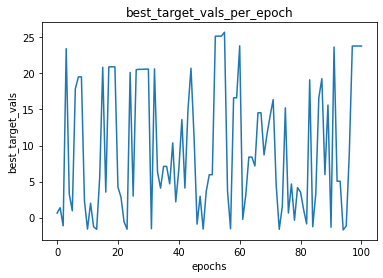

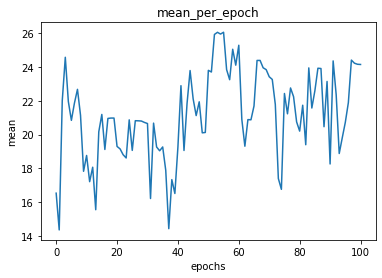

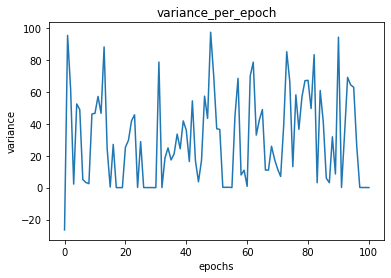

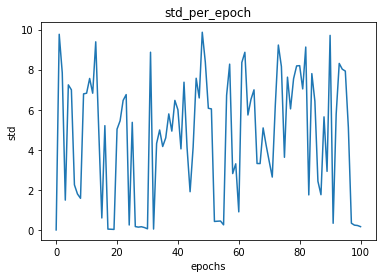

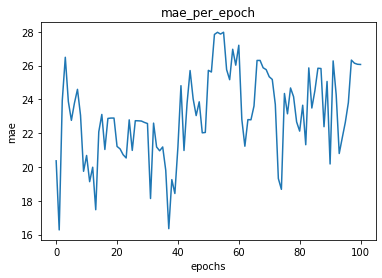

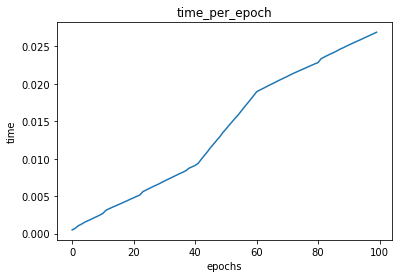

In [244]:
test0()

In [22]:
# scenario 1 roulette, arithmatic, uniform, crossover 0.5, mutation 0.1, pop_size 10, epochs 10
def test1():
    # TEST0
    opt_test = Optimizer(target=target_function, args_num=2, x1_range=X1_RANGE, x2_range=X2_RANGE,
                         precision=6, epochs=10, population_size=10, type=0,
                        selection=roulette_selection, crossover=arithmatic_crossover, crossover_prob=0.5, 
                 mutation=uniform_mutation, mutation_prob=0.1, survival_rate=0.1, elitism=0)
    
    opt_test.run()
    
    best = opt_test.getBest()
    print("found solution:",
          '\n\tbest individual:............', best.get('chromosome'), 
          '\n\ttarget_value:...............', target_function(best.get('chromosome').get()),
          '\n\tmean_in_pop:................', best.get('mean'), 
          '\n\tvariance_in_pop:............', best.get('variance'), 
          '\n\tstd_in_pop:.................', best.get('std'), 
          '\n\tmae_in_pop:.................', best.get('mae'), 
          '\n\ttime_in_pop:................', best.get('time'), 
          '\n\tepoch_number:...............', best.get('epoch'))
    
    metrics = opt_test.getMetrics()
    opt_test.plotAll()

log : Initiation on new optimizer Instance
log : Genetic Algorithm starts
log : getBest()
found solution: 
	best individual:............ (2.0898862057141088, 2.0061735870556237) 
	target_value:............... 2.071606622099023 
	mean_in_pop:................ 8.191064702009891 
	variance_in_pop:............ 5.927378453948711 
	std_in_pop:................. 2.4346208029072436 
	mae_in_pop:................. 10.104287656892165 
	time_in_pop:................ 0.003054499999999294 
	epoch_number:............... 9
log : plotting results..


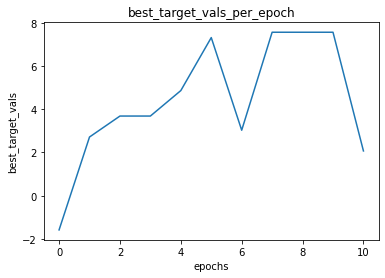

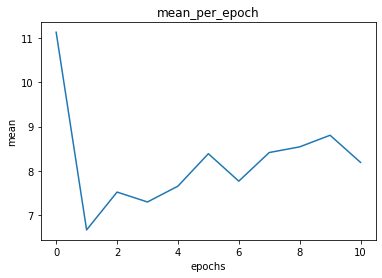

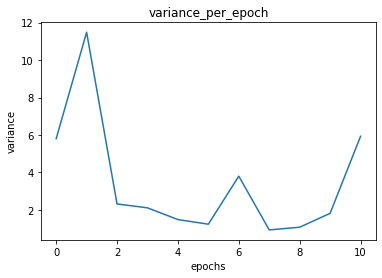

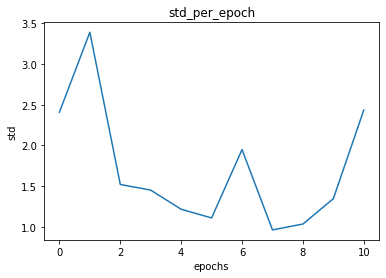

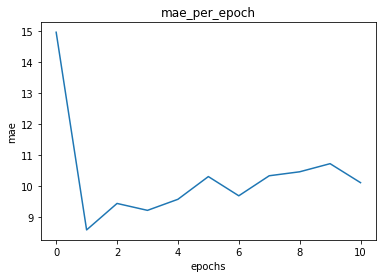

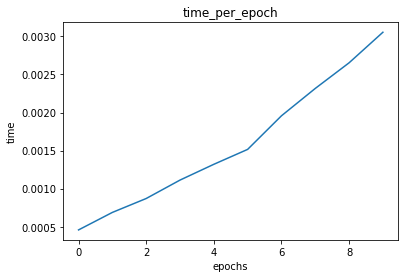

In [23]:
test1()

In [24]:
# scenario 3 roulette, arithmatic, uniform, crossover 0.5, mutation 0.1, pop_size 10, epochs 20
def test3():
    # TEST0
    opt_test = Optimizer(target=target_function, args_num=2, x1_range=X1_RANGE, x2_range=X2_RANGE,
                         precision=6, epochs=20, population_size=10, type=0,
                        selection=roulette_selection, crossover=arithmatic_crossover, crossover_prob=0.5, 
                 mutation=uniform_mutation, mutation_prob=0.1, survival_rate=0.1, elitism=0)
    
    opt_test.run()
    
    best = opt_test.getBest()
    print("found solution:",
          '\n\tbest individual:............', best.get('chromosome'), 
          '\n\ttarget_value:...............', target_function(best.get('chromosome').get()),
          '\n\tmean_in_pop:................', best.get('mean'), 
          '\n\tvariance_in_pop:............', best.get('variance'), 
          '\n\tstd_in_pop:.................', best.get('std'), 
          '\n\tmae_in_pop:.................', best.get('mae'), 
          '\n\ttime_in_pop:................', best.get('time'), 
          '\n\tepoch_number:...............', best.get('epoch'))
    
    metrics = opt_test.getMetrics()
    opt_test.plotAll()

log : Initiation on new optimizer Instance
log : Genetic Algorithm starts
log : getBest()
found solution: 
	best individual:............ (-0.7781336808144547, -0.8868983130740882) 
	target_value:............... -1.033778620651281 
	mean_in_pop:................ 13.879076150973953 
	variance_in_pop:............ 55.45301796870247 
	std_in_pop:................. 7.446678317793945 
	mae_in_pop:................. 15.792299105856227 
	time_in_pop:................ 0.003402099999997965 
	epoch_number:............... 13
log : plotting results..


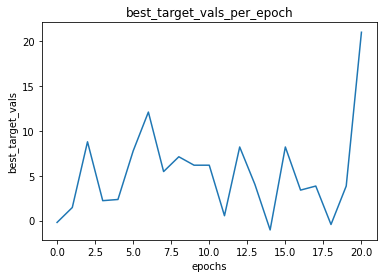

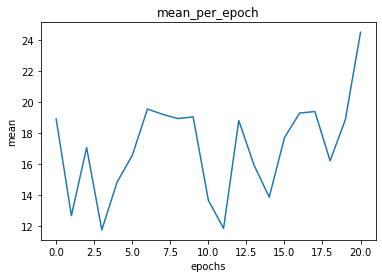

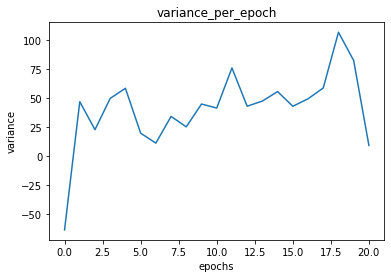

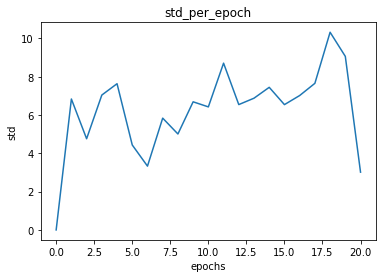

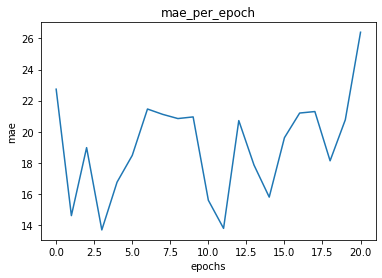

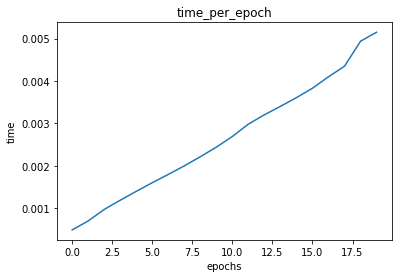

In [25]:
test3()

In [26]:
# scenario 4 roulette, arithmatic, uniform, crossover 0.5, mutation 0.1, pop_size 10, epochs 50 
def test4():
    # TEST0
    opt_test = Optimizer(target=target_function, args_num=2, x1_range=X1_RANGE, x2_range=X2_RANGE,
                         precision=6, epochs=5, population_size=50, type=0,
                        selection=roulette_selection, crossover=arithmatic_crossover, crossover_prob=0.5, 
                 mutation=uniform_mutation, mutation_prob=0.1, survival_rate=0.1, elitism=0)
    
    opt_test.run()
    
    best = opt_test.getBest()
    print("found solution:",
          '\n\tbest individual:............', best.get('chromosome'), 
          '\n\ttarget_value:...............', target_function(best.get('chromosome').get()),
          '\n\tmean_in_pop:................', best.get('mean'), 
          '\n\tvariance_in_pop:............', best.get('variance'), 
          '\n\tstd_in_pop:.................', best.get('std'), 
          '\n\tmae_in_pop:.................', best.get('mae'), 
          '\n\ttime_in_pop:................', best.get('time'), 
          '\n\tepoch_number:...............', best.get('epoch'))
    
    metrics = opt_test.getMetrics()
    opt_test.plotAll()

log : Initiation on new optimizer Instance
log : Genetic Algorithm starts
log : getBest()
found solution: 
	best individual:............ (-1.43529651547562, -2.120291100797895) 
	target_value:............... -1.2762953960019003 
	mean_in_pop:................ 23.753862275435612 
	variance_in_pop:............ 139.17682983096557 
	std_in_pop:................. 11.79732299426296 
	mae_in_pop:................. 25.667085230317888 
	time_in_pop:................ 0.010934799999999356 
	epoch_number:............... 2
log : plotting results..


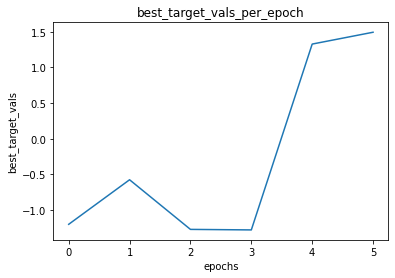

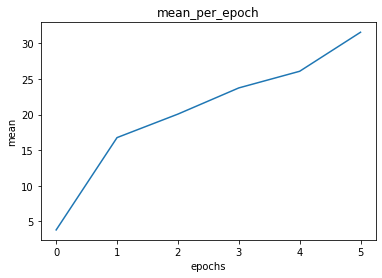

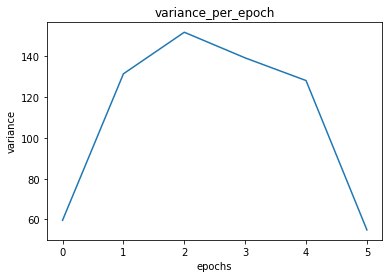

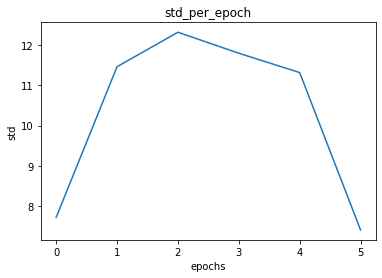

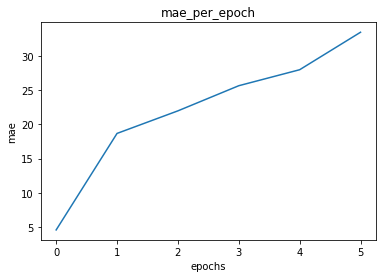

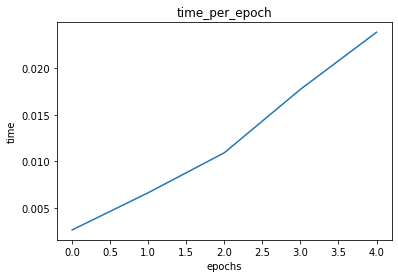

In [27]:
test4()

In [28]:
# scenario 5 roulette, arithmatic, uniform, crossover 0.5, mutation 0.1, pop_size 10, epochs 100
def test5():
    # TEST0
    opt_test = Optimizer(target=target_function, args_num=2, x1_range=X1_RANGE, x2_range=X2_RANGE,
                         precision=6, epochs=100, population_size=10, type=0,
                        selection=roulette_selection, crossover=arithmatic_crossover, crossover_prob=0.5, 
                 mutation=uniform_mutation, mutation_prob=0.1, survival_rate=0.1, elitism=0)
    
    opt_test.run()
    
    best = opt_test.getBest()
    print("found solution:",
          '\n\tbest individual:............', best.get('chromosome'), 
          '\n\ttarget_value:...............', target_function(best.get('chromosome').get()),
          '\n\tmean_in_pop:................', best.get('mean'), 
          '\n\tvariance_in_pop:............', best.get('variance'), 
          '\n\tstd_in_pop:.................', best.get('std'), 
          '\n\tmae_in_pop:.................', best.get('mae'), 
          '\n\ttime_in_pop:................', best.get('time'), 
          '\n\tepoch_number:...............', best.get('epoch'))
    
    metrics = opt_test.getMetrics()
    opt_test.plotAll()

log : Initiation on new optimizer Instance
log : Genetic Algorithm starts
log : getBest()
found solution: 
	best individual:............ (-0.7186096768378638, -1.2718826138057249) 
	target_value:............... -1.708893948503627 
	mean_in_pop:................ 20.563820986603076 
	variance_in_pop:............ 69.49864336919427 
	std_in_pop:................. 8.336584634560742 
	mae_in_pop:................. 22.477043941485356 
	time_in_pop:................ 0.02076449999999408 
	epoch_number:............... 82
log : plotting results..


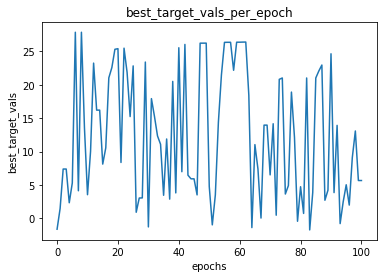

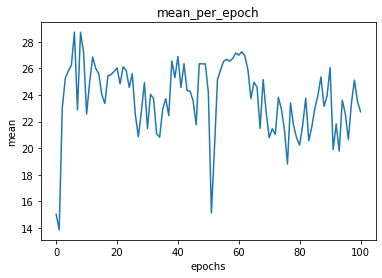

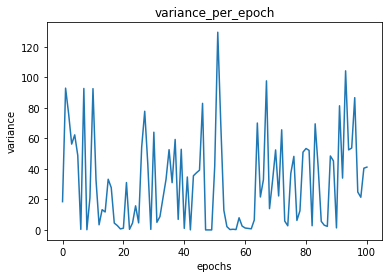

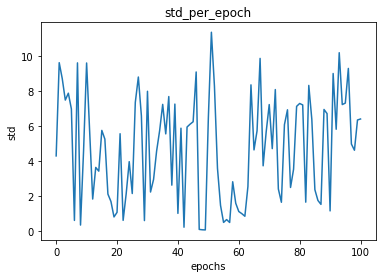

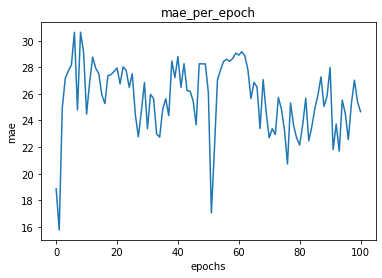

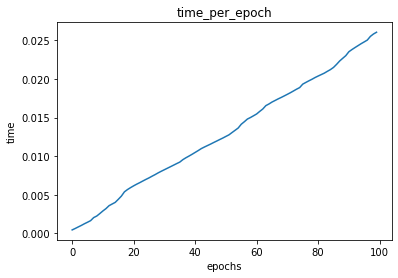

In [29]:
test5()

In [64]:
# scenario 7 roulette, arithmatic, uniform, crossover 0.5, mutation 0.1, pop_size 20, epochs 10
def test7():
    # TEST0
    opt_test = Optimizer(target=target_function, args_num=2, x1_range=X1_RANGE, x2_range=X2_RANGE,
                         precision=6, epochs=10, population_size=20, type=0,
                        selection=roulette_selection, crossover=arithmatic_crossover, crossover_prob=0.5, 
                 mutation=uniform_mutation, mutation_prob=0.1, survival_rate=0.1, elitism=0)
    
    opt_test.run()
    
    best = opt_test.getBest()
    print("found solution:",
          '\n\tbest individual:............', best.get('chromosome'), 
          '\n\ttarget_value:...............', target_function(best.get('chromosome').get()),
          '\n\tmean_in_pop:................', best.get('mean'), 
          '\n\tvariance_in_pop:............', best.get('variance'), 
          '\n\tstd_in_pop:.................', best.get('std'), 
          '\n\tmae_in_pop:.................', best.get('mae'), 
          '\n\ttime_in_pop:................', best.get('time'), 
          '\n\tepoch_number:...............', best.get('epoch'))
    
    metrics = opt_test.getMetrics()
    opt_test.plotAll()

log : Initiation on new optimizer Instance
log : Genetic Algorithm starts
log : getBest()
found solution: 
	best individual:............ (0.4437426675626, -1.4784502170197484) 
	target_value:............... -0.5266270744724162 
	mean_in_pop:................ 15.637682119481777 
	variance_in_pop:............ 74.55642298716452 
	std_in_pop:................. 8.634606128085085 
	mae_in_pop:................. 17.550905074364046 
	time_in_pop:................ 0.005235900000116089 
	epoch_number:............... 5
log : plotting results..


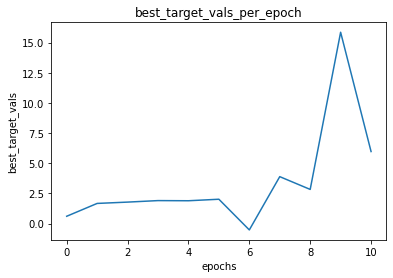

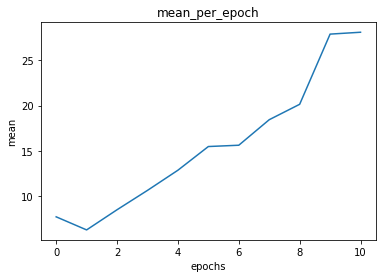

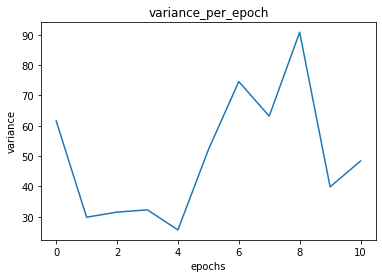

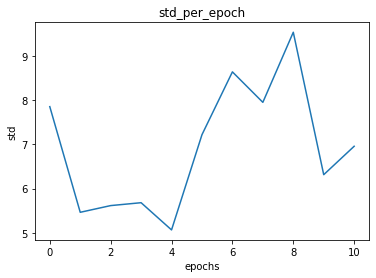

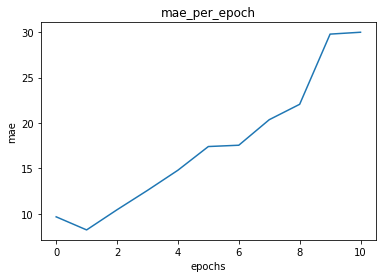

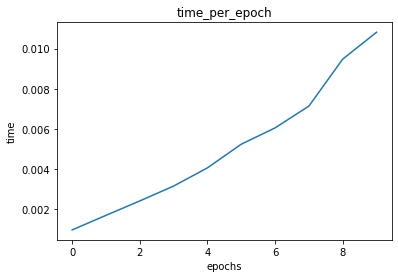

In [65]:
test7()

In [66]:
# scenario 8 roulette, arithmatic, uniform, crossover 0.5, mutation 0.1, pop_size 50, epochs 10
def test8():
    # TEST0
    opt_test = Optimizer(target=target_function, args_num=2, x1_range=X1_RANGE, x2_range=X2_RANGE,
                         precision=6, epochs=10, population_size=50, type=0,
                        selection=roulette_selection, crossover=arithmatic_crossover, crossover_prob=0.5, 
                 mutation=uniform_mutation, mutation_prob=0.1, survival_rate=0.1, elitism=0)
    
    opt_test.run()
    
    best = opt_test.getBest()
    print("found solution:",
          '\n\tbest individual:............', best.get('chromosome'), 
          '\n\ttarget_value:...............', target_function(best.get('chromosome').get()),
          '\n\tmean_in_pop:................', best.get('mean'), 
          '\n\tvariance_in_pop:............', best.get('variance'), 
          '\n\tstd_in_pop:.................', best.get('std'), 
          '\n\tmae_in_pop:.................', best.get('mae'), 
          '\n\ttime_in_pop:................', best.get('time'), 
          '\n\tepoch_number:...............', best.get('epoch'))
    
    metrics = opt_test.getMetrics()
    opt_test.plotAll()

log : Initiation on new optimizer Instance
log : Genetic Algorithm starts
log : getBest()
found solution: 
	best individual:............ (0.010741602401665995, -1.1944283673166107) 
	target_value:............... -1.4757527717633265 
	mean_in_pop:................ 17.859306369828765 
	variance_in_pop:............ 36.754807078126724 
	std_in_pop:................. 6.062574294648003 
	mae_in_pop:................. 19.772529324711044 
	time_in_pop:................ 0.01808830000118178 
	epoch_number:............... 4
log : plotting results..


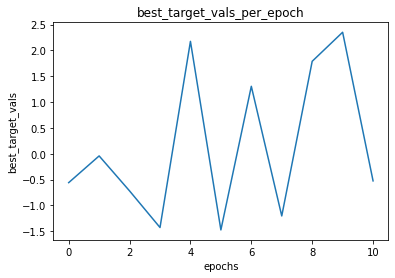

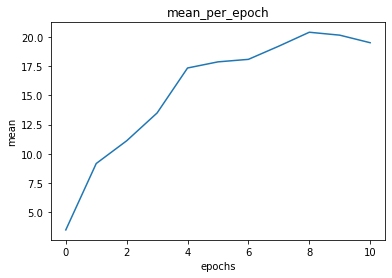

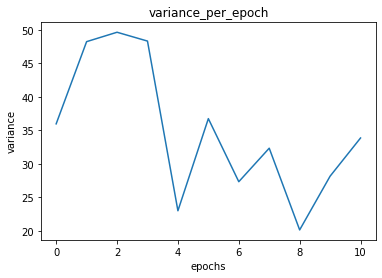

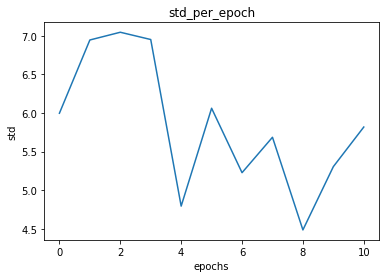

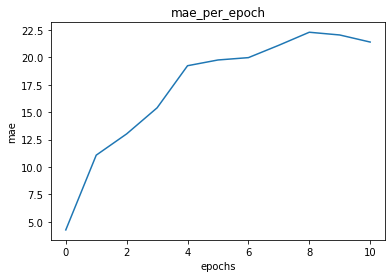

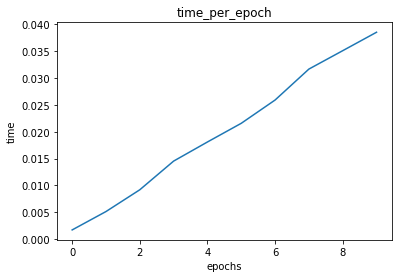

In [67]:
test8()

In [279]:
# scenario 9 roulette, arithmatic, uniform, crossover 0.9, mutation 0.3, pop_size 100, epochs 100
def test9():
    # TEST0
    opt_test = Optimizer(target=target_function, args_num=2, x1_range=X1_RANGE, x2_range=X2_RANGE,
                         precision=3, epochs=100, population_size=100, type=0,
                        selection=roulette_selection, crossover=arithmatic_crossover, crossover_prob=0.9, 
                 mutation=uniform_mutation, mutation_prob=0.3, survival_rate=0.1, elitism=1)
    
    opt_test.run()
    
    best = opt_test.getBest()
    print("found solution:",
          '\n\tbest individual:............', best.get('chromosome'), 
          '\n\ttarget_value:...............', target_function(best.get('chromosome').get()),
          '\n\tmean_in_pop:................', best.get('mean'), 
          '\n\tvariance_in_pop:............', best.get('variance'), 
          '\n\tstd_in_pop:.................', best.get('std'), 
          '\n\tmae_in_pop:.................', best.get('mae'), 
          '\n\ttime_in_pop:................', best.get('time'), 
          '\n\tepoch_number:...............', best.get('epoch'))
    
    #metrics = opt_test.getMetrics(True, 100)
    opt_test.plotAll()
    opt_test.plotTargetStd()

log : Initiation on new optimizer Instance
log : Genetic Algorithm starts
log : getBest()
found solution: 
	best individual:............ (-0.5714363338665756, -1.481549512403093) 
	target_value:............... -1.9043950054272676 
	mean_in_pop:................ 18.700260340631964 
	variance_in_pop:............ 134.17045837952793 
	std_in_pop:................. 11.583197243400802 
	mae_in_pop:................. 20.61348329551424 
	time_in_pop:................ 1.466822599990337 
	epoch_number:............... 86
log : plotting results..


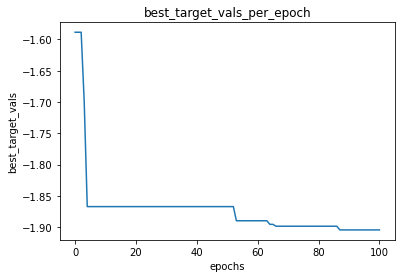

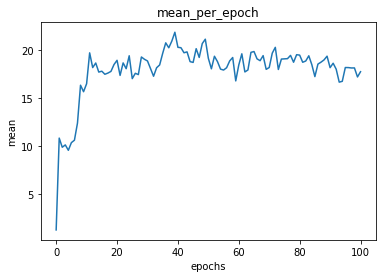

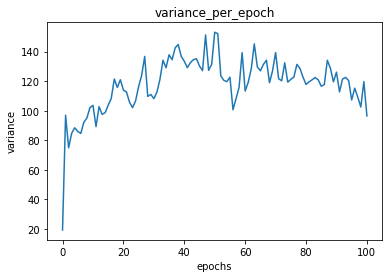

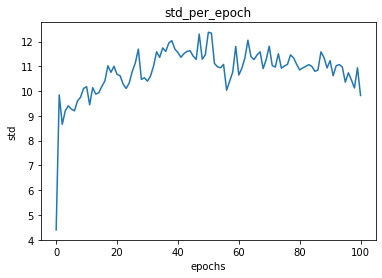

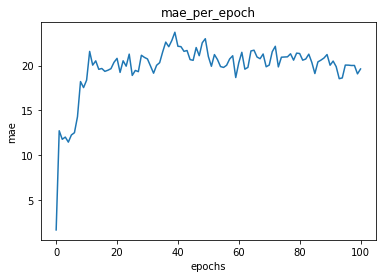

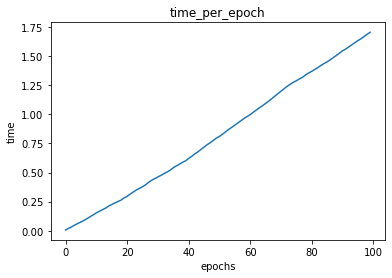

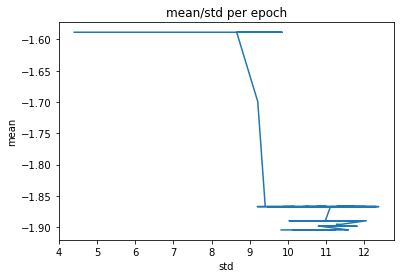

In [281]:
test9()

In [261]:
# scenario 10 roulette, arithmatic, uniform, crossover 0.5, mutation 0.5, pop_size 20, epochs 100
def test10():
    # TEST0
    opt_test = Optimizer(target=target_function, args_num=2, x1_range=X1_RANGE, x2_range=X2_RANGE,
                         precision=6, epochs=100, population_size=20, type=0,
                        selection=roulette_selection, crossover=arithmatic_crossover, crossover_prob=0.5, 
                 mutation=uniform_mutation, mutation_prob=0.1, survival_rate=0.1, elitism=0)
    
    opt_test.run()
    
    best = opt_test.getBest()
    print("found solution:",
          '\n\tbest individual:............', best.get('chromosome'), 
          '\n\ttarget_value:...............', target_function(best.get('chromosome').get()),
          '\n\tmean_in_pop:................', best.get('mean'), 
          '\n\tvariance_in_pop:............', best.get('variance'), 
          '\n\tstd_in_pop:.................', best.get('std'), 
          '\n\tmae_in_pop:.................', best.get('mae'), 
          '\n\ttime_in_pop:................', best.get('time'), 
          '\n\tepoch_number:...............', best.get('epoch'))
    
    metrics = opt_test.getMetrics()
    opt_test.plotAll()

log : Initiation on new optimizer Instance
log : Genetic Algorithm starts
log : getBest()
found solution: 
	best individual:............ (-0.5379618963827136, -1.4742051782575503) 
	target_value:............... -1.9061855760215671 
	mean_in_pop:................ 14.244472599166269 
	variance_in_pop:............ 71.62891572548718 
	std_in_pop:................. 8.46338677631403 
	mae_in_pop:................. 16.157695554048548 
	time_in_pop:................ 0.058535900001515984 
	epoch_number:............... 71
log : plotting results..


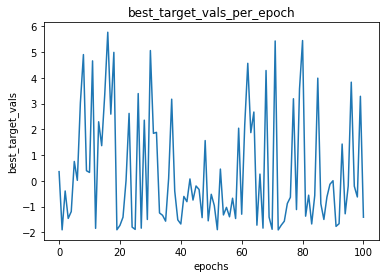

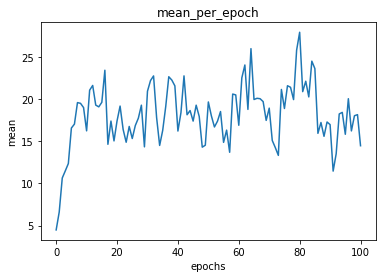

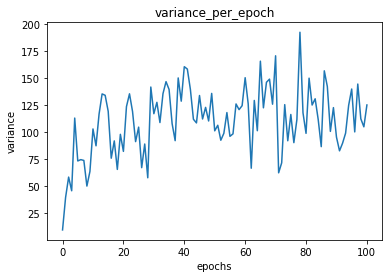

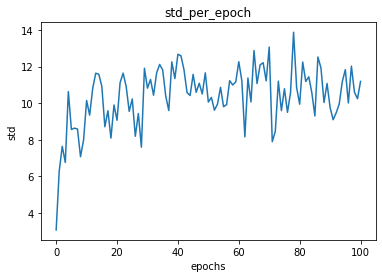

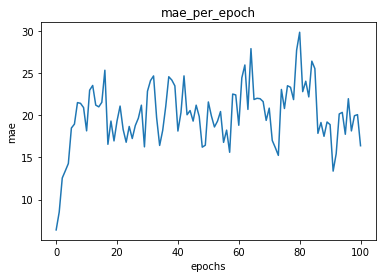

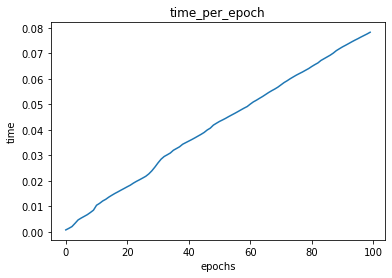

In [92]:
test10()

In [38]:
# scenario 11 roulette, arithmatic, uniform, crossover 0.8, mutation 0.5, pop_size 10, epochs 100
def test11():
    # TEST0
    opt_test = Optimizer(target=target_function, args_num=2, x1_range=X1_RANGE, x2_range=X2_RANGE,
                         precision=6, epochs=10, population_size=10, type=0,
                        selection=roulette_selection, crossover=arithmatic_crossover, crossover_prob=0.8, 
                 mutation=uniform_mutation, mutation_prob=0.5, survival_rate=0.1, elitism=0)
    
    opt_test.run()
    
    best = opt_test.getBest()
    print("found solution:",
          '\n\tbest individual:............', best.get('chromosome'), 
          '\n\ttarget_value:...............', target_function(best.get('chromosome').get()),
          '\n\tmean_in_pop:................', best.get('mean'), 
          '\n\tvariance_in_pop:............', best.get('variance'), 
          '\n\tstd_in_pop:.................', best.get('std'), 
          '\n\tmae_in_pop:.................', best.get('mae'), 
          '\n\ttime_in_pop:................', best.get('time'), 
          '\n\tepoch_number:...............', best.get('epoch'))
    
    metrics = opt_test.getMetrics()
    opt_test.plotAll()

log : Initiation on new optimizer Instance
log : Genetic Algorithm starts
log : getBest()
found solution: 
	best individual:............ (-0.9154760235049346, -1.8095142554776031) 
	target_value:............... -1.7559230145045532 
	mean_in_pop:................ 8.332725344149484 
	variance_in_pop:............ 49.5952936585213 
	std_in_pop:................. 7.042392608944867 
	mae_in_pop:................. 10.245948299031758 
	time_in_pop:................ 0.00049869999999963 
	epoch_number:............... 0
log : plotting results..


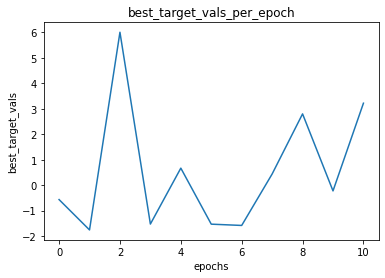

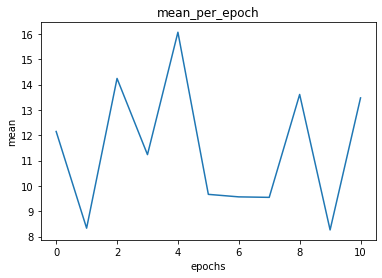

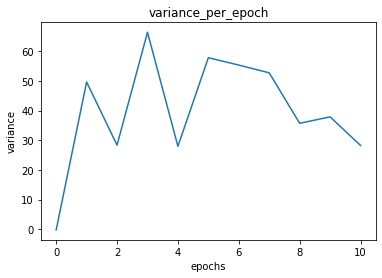

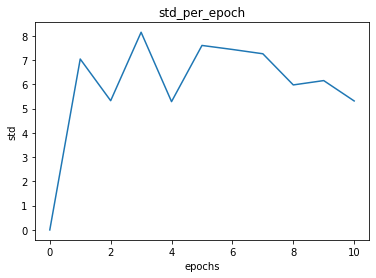

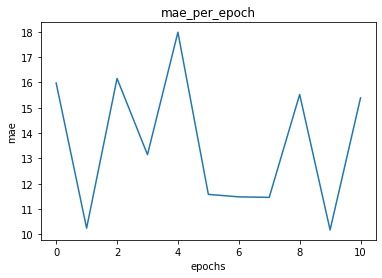

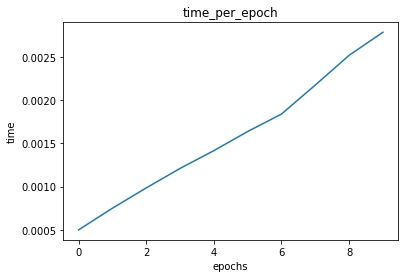

In [39]:
test11()

In [40]:
# scenario 12 roulette, arithmatic, uniform, crossover 0.8, mutation 0.1, pop_size 10, epochs 100, elitism 1, 0.1
def test12():
    # TEST0
    opt_test = Optimizer(target=target_function, args_num=2, x1_range=X1_RANGE, x2_range=X2_RANGE,
                         precision=6, epochs=10, population_size=10, type=0,
                        selection=roulette_selection, crossover=arithmatic_crossover, crossover_prob=0.8, 
                 mutation=uniform_mutation, mutation_prob=0.5, survival_rate=0.1, elitism=1)
    
    opt_test.run()
    
    best = opt_test.getBest()
    print("found solution:",
          '\n\tbest individual:............', best.get('chromosome'), 
          '\n\ttarget_value:...............', target_function(best.get('chromosome').get()),
          '\n\tmean_in_pop:................', best.get('mean'), 
          '\n\tvariance_in_pop:............', best.get('variance'), 
          '\n\tstd_in_pop:.................', best.get('std'), 
          '\n\tmae_in_pop:.................', best.get('mae'), 
          '\n\ttime_in_pop:................', best.get('time'), 
          '\n\tepoch_number:...............', best.get('epoch'))
    
    metrics = opt_test.getMetrics()
    opt_test.plotAll()

log : Initiation on new optimizer Instance
log : Genetic Algorithm starts
log : getBest()
found solution: 
	best individual:............ (-0.5159913514405046, -1.4273515245570692) 
	target_value:............... -1.8952178711710905 
	mean_in_pop:................ 8.330124352027747 
	variance_in_pop:............ 60.076086541811264 
	std_in_pop:................. 7.750876501519764 
	mae_in_pop:................. 10.243347306910021 
	time_in_pop:................ 0.000780000000000669 
	epoch_number:............... 0
log : plotting results..


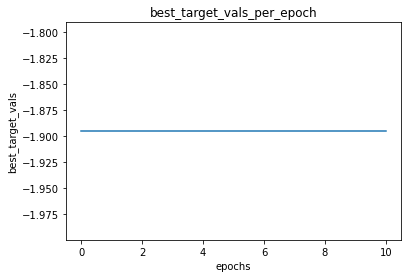

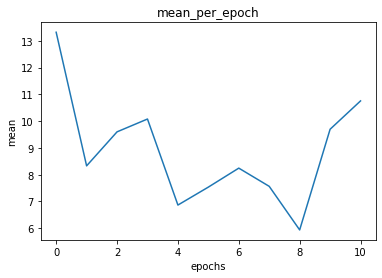

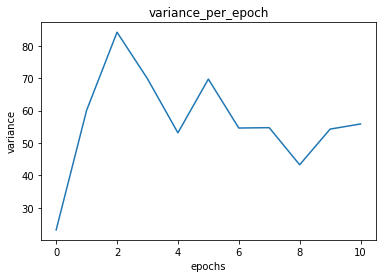

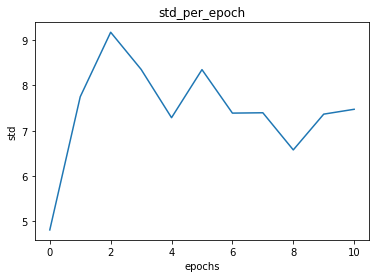

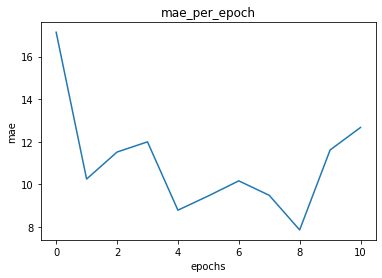

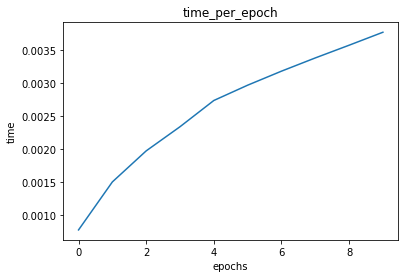

In [41]:
test12()

In [42]:
# scenario 14 tournament, arithmatic, uniform, crossover 0.8, mutation 0.1, pop_size 10, epochs 100
def test14():
    # TEST0
    opt_test = Optimizer(target=target_function, args_num=2, x1_range=X1_RANGE, x2_range=X2_RANGE,
                         precision=6, epochs=10, population_size=10, type=0,
                        selection=tournament_selection, crossover=arithmatic_crossover, crossover_prob=0.8, 
                 mutation=uniform_mutation, mutation_prob=0.5, survival_rate=0.1, elitism=0)
    
    opt_test.run()
    
    best = opt_test.getBest()
    print("found solution:",
          '\n\tbest individual:............', best.get('chromosome'), 
          '\n\ttarget_value:...............', target_function(best.get('chromosome').get()),
          '\n\tmean_in_pop:................', best.get('mean'), 
          '\n\tvariance_in_pop:............', best.get('variance'), 
          '\n\tstd_in_pop:.................', best.get('std'), 
          '\n\tmae_in_pop:.................', best.get('mae'), 
          '\n\ttime_in_pop:................', best.get('time'), 
          '\n\tepoch_number:...............', best.get('epoch'))
    
    metrics = opt_test.getMetrics()
    opt_test.plotAll()

log : Initiation on new optimizer Instance
log : Genetic Algorithm starts
log : getBest()
found solution: 
	best individual:............ (-0.43080336425393206, -1.6002024945391673) 
	target_value:............... -1.8827663205774199 
	mean_in_pop:................ 0.10047223171496263 
	variance_in_pop:............ 8.36257068094093 
	std_in_pop:................. 2.8918109690885623 
	mae_in_pop:................. 2.0136951865972366 
	time_in_pop:................ 0.0023682999999969923 
	epoch_number:............... 7
log : plotting results..


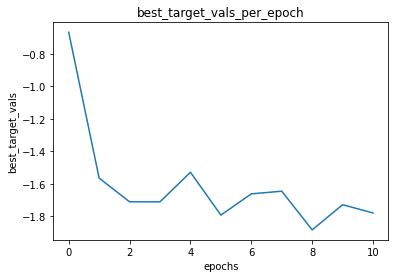

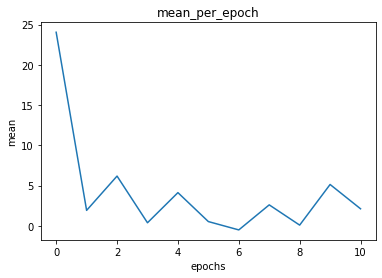

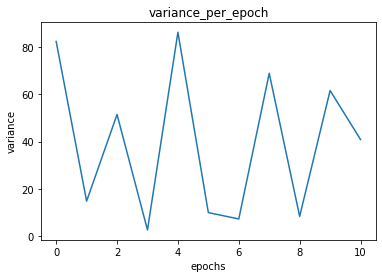

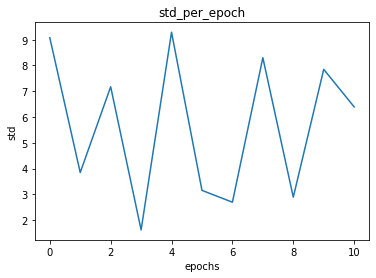

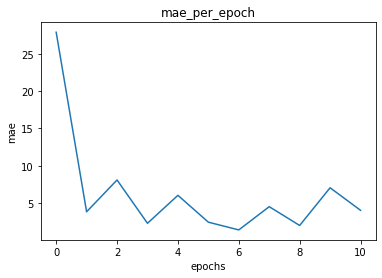

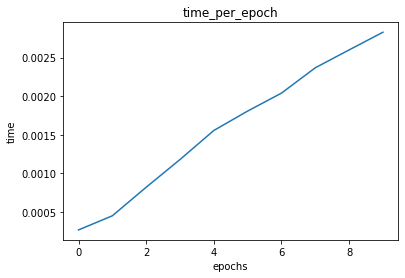

In [43]:
test14()

In [44]:
# scenario 15 roulette, heuristyc, uniform, crossover 0.8, mutation 0.1, pop_size 10, epochs 100
def test15():
    # TEST0
    opt_test = Optimizer(target=target_function, args_num=2, x1_range=X1_RANGE, x2_range=X2_RANGE,
                         precision=6, epochs=10, population_size=10, type=0,
                        selection=roulette_selection, crossover=heuristic_crossover, crossover_prob=0.8, 
                 mutation=uniform_mutation, mutation_prob=0.5, survival_rate=0.1, elitism=0)
    
    opt_test.run()
    
    best = opt_test.getBest()
    print("found solution:",
          '\n\tbest individual:............', best.get('chromosome'), 
          '\n\ttarget_value:...............', target_function(best.get('chromosome').get()),
          '\n\tmean_in_pop:................', best.get('mean'), 
          '\n\tvariance_in_pop:............', best.get('variance'), 
          '\n\tstd_in_pop:.................', best.get('std'), 
          '\n\tmae_in_pop:.................', best.get('mae'), 
          '\n\ttime_in_pop:................', best.get('time'), 
          '\n\tepoch_number:...............', best.get('epoch'))
    
    metrics = opt_test.getMetrics()
    opt_test.plotAll()

log : Initiation on new optimizer Instance
log : Genetic Algorithm starts
log : getBest()
found solution: 
	best individual:............ (-0.208070734381558, -1.1811635859414047) 
	target_value:............... -1.6774560128515121 
	mean_in_pop:................ 18.88322317630056 
	variance_in_pop:............ 154.78611233721963 
	std_in_pop:................. 12.441306697337689 
	mae_in_pop:................. 20.79644613118283 
	time_in_pop:................ 0.010988900000002744 
	epoch_number:............... 8
log : plotting results..


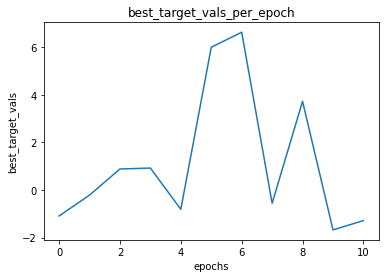

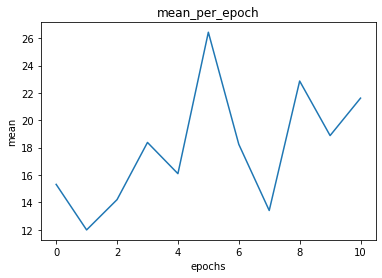

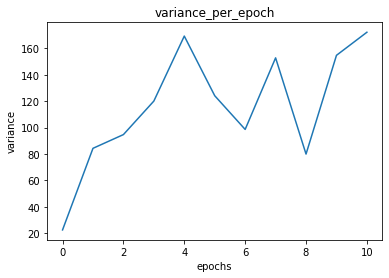

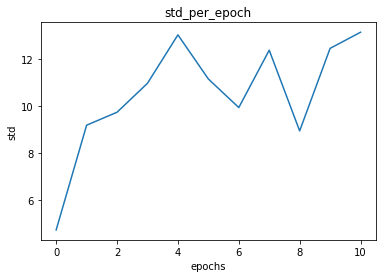

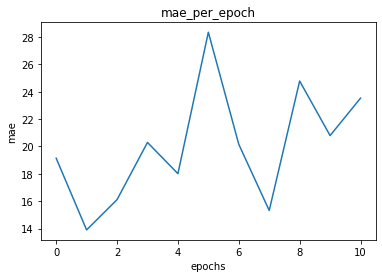

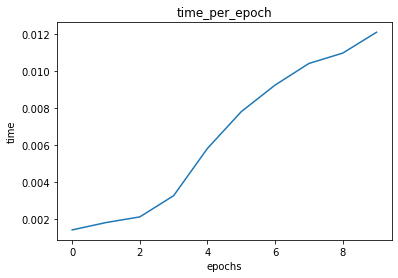

In [45]:
test15()

In [46]:
# scenario 16 roulette, arithmatic, uniform, crossover 0.8, mutation 0.1, pop_size 10, epochs 100
def test16():
    # TEST0
    opt_test = Optimizer(target=target_function, args_num=2, x1_range=X1_RANGE, x2_range=X2_RANGE,
                         precision=6, epochs=10, population_size=10, type=0,
                        selection=roulette_selection, crossover=arithmatic_crossover, crossover_prob=0.8, 
                 mutation=swap_mutation, mutation_prob=0.5, survival_rate=0.1, elitism=0)
    
    opt_test.run()
    
    best = opt_test.getBest()
    print("found solution:",
          '\n\tbest individual:............', best.get('chromosome'), 
          '\n\ttarget_value:...............', target_function(best.get('chromosome').get()),
          '\n\tmean_in_pop:................', best.get('mean'), 
          '\n\tvariance_in_pop:............', best.get('variance'), 
          '\n\tstd_in_pop:.................', best.get('std'), 
          '\n\tmae_in_pop:.................', best.get('mae'), 
          '\n\ttime_in_pop:................', best.get('time'), 
          '\n\tepoch_number:...............', best.get('epoch'))
    
    metrics = opt_test.getMetrics()
    opt_test.plotAll()